In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [2]:
import utils

## Navigating Webpages: Long-run probabilities for each webpage

In [3]:
P = np.array([ 
    
    [0, 0.75, 0.35, 0.25, 0.85], 
    [0.15, 0, 0.35, 0.25, 0.05], 
    [0.15, 0.15, 0, 0.25, 0.05], 
    [0.15, 0.05, 0.05, 0, 0.05], 
    [0.55, 0.05, 0.25, 0.25, 0]  
]) 

X0 = np.array([[0],[0],[0],[1],[0]])


X1 = P @ X0


print(f'Sum of columns of P: {sum(P)}')
print(f'X1:\n{X1}')

Sum of columns of P: [1. 1. 1. 1. 1.]
X1:
[[0.25]
 [0.25]
 [0.25]
 [0.  ]
 [0.25]]


In [4]:
X = np.array([[0],[0],[0],[1],[0]])
m = 20

for t in range(m):
    X = P @ X
    
print(X)

[[0.39392366]
 [0.13392366]
 [0.11407667]
 [0.0850993 ]
 [0.27297672]]


In [5]:
eigenvals, eigenvecs = np.linalg.eig(P)
print(f'Eigenvalues of P:\n{eigenvals}\n\nEigenvectors of P\n{eigenvecs}')

Eigenvalues of P:
[ 1.         -0.70367062  0.00539505 -0.08267227 -0.21905217]

Eigenvectors of P
[[-0.76088562 -0.81362074  0.10935376  0.14270615 -0.39408574]
 [-0.25879453  0.050269   -0.6653158   0.67528802 -0.66465044]
 [-0.2204546   0.07869601 -0.29090665  0.17007443  0.35048734]
 [-0.1644783   0.12446953  0.19740707 -0.43678067  0.23311487]
 [-0.52766004  0.56018621  0.64946163 -0.55128793  0.47513398]]


In [6]:
X_inf = eigenvecs[:,0]

print(f"Eigenvector corresponding to the eigenvalue 1:\n{X_inf[:,np.newaxis]}")

Eigenvector corresponding to the eigenvalue 1:
[[-0.76088562]
 [-0.25879453]
 [-0.2204546 ]
 [-0.1644783 ]
 [-0.52766004]]


In [7]:
def check_eigenvector(P, X_inf):
    X_check = P @ X_inf
    return X_check

X_check = check_eigenvector(P, X_inf)
print("Original eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))
print("Result of multiplication:" + str(X_check))

print("Check that PX=X element by element:" + str(np.isclose(X_inf, X_check, rtol=1e-10)))

Original eigenvector corresponding to the eigenvalue 1:
[-0.76088562 -0.25879453 -0.2204546  -0.1644783  -0.52766004]
Result of multiplication:[-0.76088562 -0.25879453 -0.2204546  -0.1644783  -0.52766004]
Check that PX=X element by element:[ True  True  True  True  True]


In [8]:
X_inf = X_inf/sum(X_inf)
print(f"Long-run probabilities of being at each webpage:\n{X_inf[:,np.newaxis]}")

Long-run probabilities of being at each webpage:
[[0.39377747]
 [0.13393269]
 [0.11409081]
 [0.08512166]
 [0.27307736]]


## Principal Component Analysis

In [9]:
imgs = utils.load_images('./data/')

In [10]:
height, width = imgs[0].shape

print(f'\nYour dataset has {len(imgs)} images of size {height}x{width} pixels\n')


Your dataset has 55 images of size 64x64 pixels



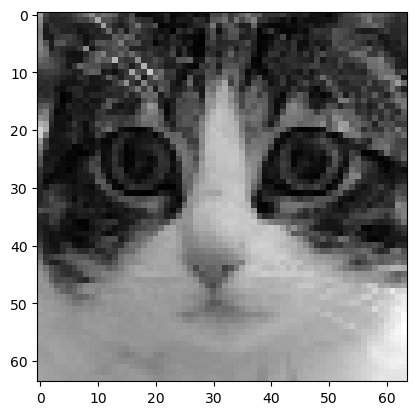

In [11]:
plt.imshow(imgs[8], cmap='gray')

In [12]:
imgs_flatten = np.array([im.reshape(-1) for im in imgs])

print(f'imgs_flatten shape: {imgs_flatten.shape}')

imgs_flatten shape: (55, 4096)


In [13]:
def center_data(Y):
    mean_vector = np.mean(Y, axis=0)
    mean_matrix = np.repeat(mean_vector, Y.shape[0])
    mean_matrix = np.reshape(mean_matrix, (Y.shape[0],Y.shape[1]), order="F")
    
    X = np.subtract(Y,mean_matrix)
    return X

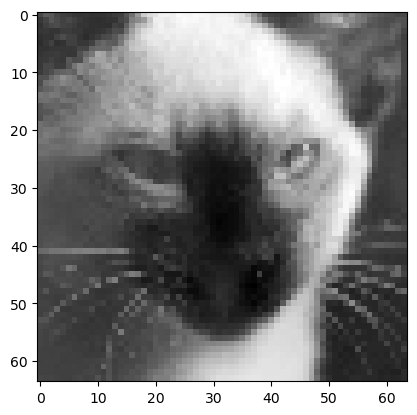

In [14]:
X = center_data(imgs_flatten)
plt.imshow(X[0].reshape(64,64), cmap='gray')

In [15]:
def get_cov_matrix(X):

    cov_matrix = np.dot(np.transpose(X), X)
    cov_matrix = cov_matrix/(X.shape[0] - 1)
    
    return cov_matrix

In [16]:
cov_matrix = get_cov_matrix(X)

In [17]:
print(f'Covariance matrix shape: {cov_matrix.shape}')

Covariance matrix shape: (4096, 4096)


In [20]:
np.random.seed(7)
eigenvals, eigenvecs = scipy.sparse.linalg.eigsh(cov_matrix, k=55)
print(f'Ten largest eigenvalues: \n{eigenvals[-10:]}')

Ten largest eigenvalues: 
[ 293297.76716381  383558.95285037  399091.64921256  479564.23517501
  839756.42124326  879138.93723794 1011092.7845815  1536790.5408648
 2484055.10309963 4198829.23262023]


In [22]:
eigenvals = eigenvals[::-1]
eigenvecs = eigenvecs[:,::-1]

print(f'Ten largest eigenvalues: \n{eigenvals[:10]}')

Ten largest eigenvalues: 
[-1.69648359e-10  2.18286859e+04  2.32524555e+04  2.42927651e+04
  2.72805665e+04  3.01109169e+04  3.17690104e+04  3.22255358e+04
  3.44157634e+04  3.55995821e+04]


In [23]:
eigenvecs

array([[-0.01552802,  0.01168192,  0.03575923, ...,  0.01142374,
         0.01123649, -0.01099733],
       [ 0.00301409,  0.00558766,  0.0086309 , ...,  0.00687738,
         0.012384  , -0.01295321],
       [ 0.02768319, -0.00422674,  0.00162667, ...,  0.00922958,
         0.0096673 , -0.01299185],
       ...,
       [-0.00567304, -0.00284574,  0.00417906, ..., -0.03753367,
        -0.01381978, -0.01342535],
       [-0.01206703,  0.00313632, -0.00442618, ..., -0.03580881,
        -0.0127074 , -0.01281947],
       [-0.01874918,  0.01784558, -0.00109195, ..., -0.0340899 ,
        -0.01208863, -0.01275942]])

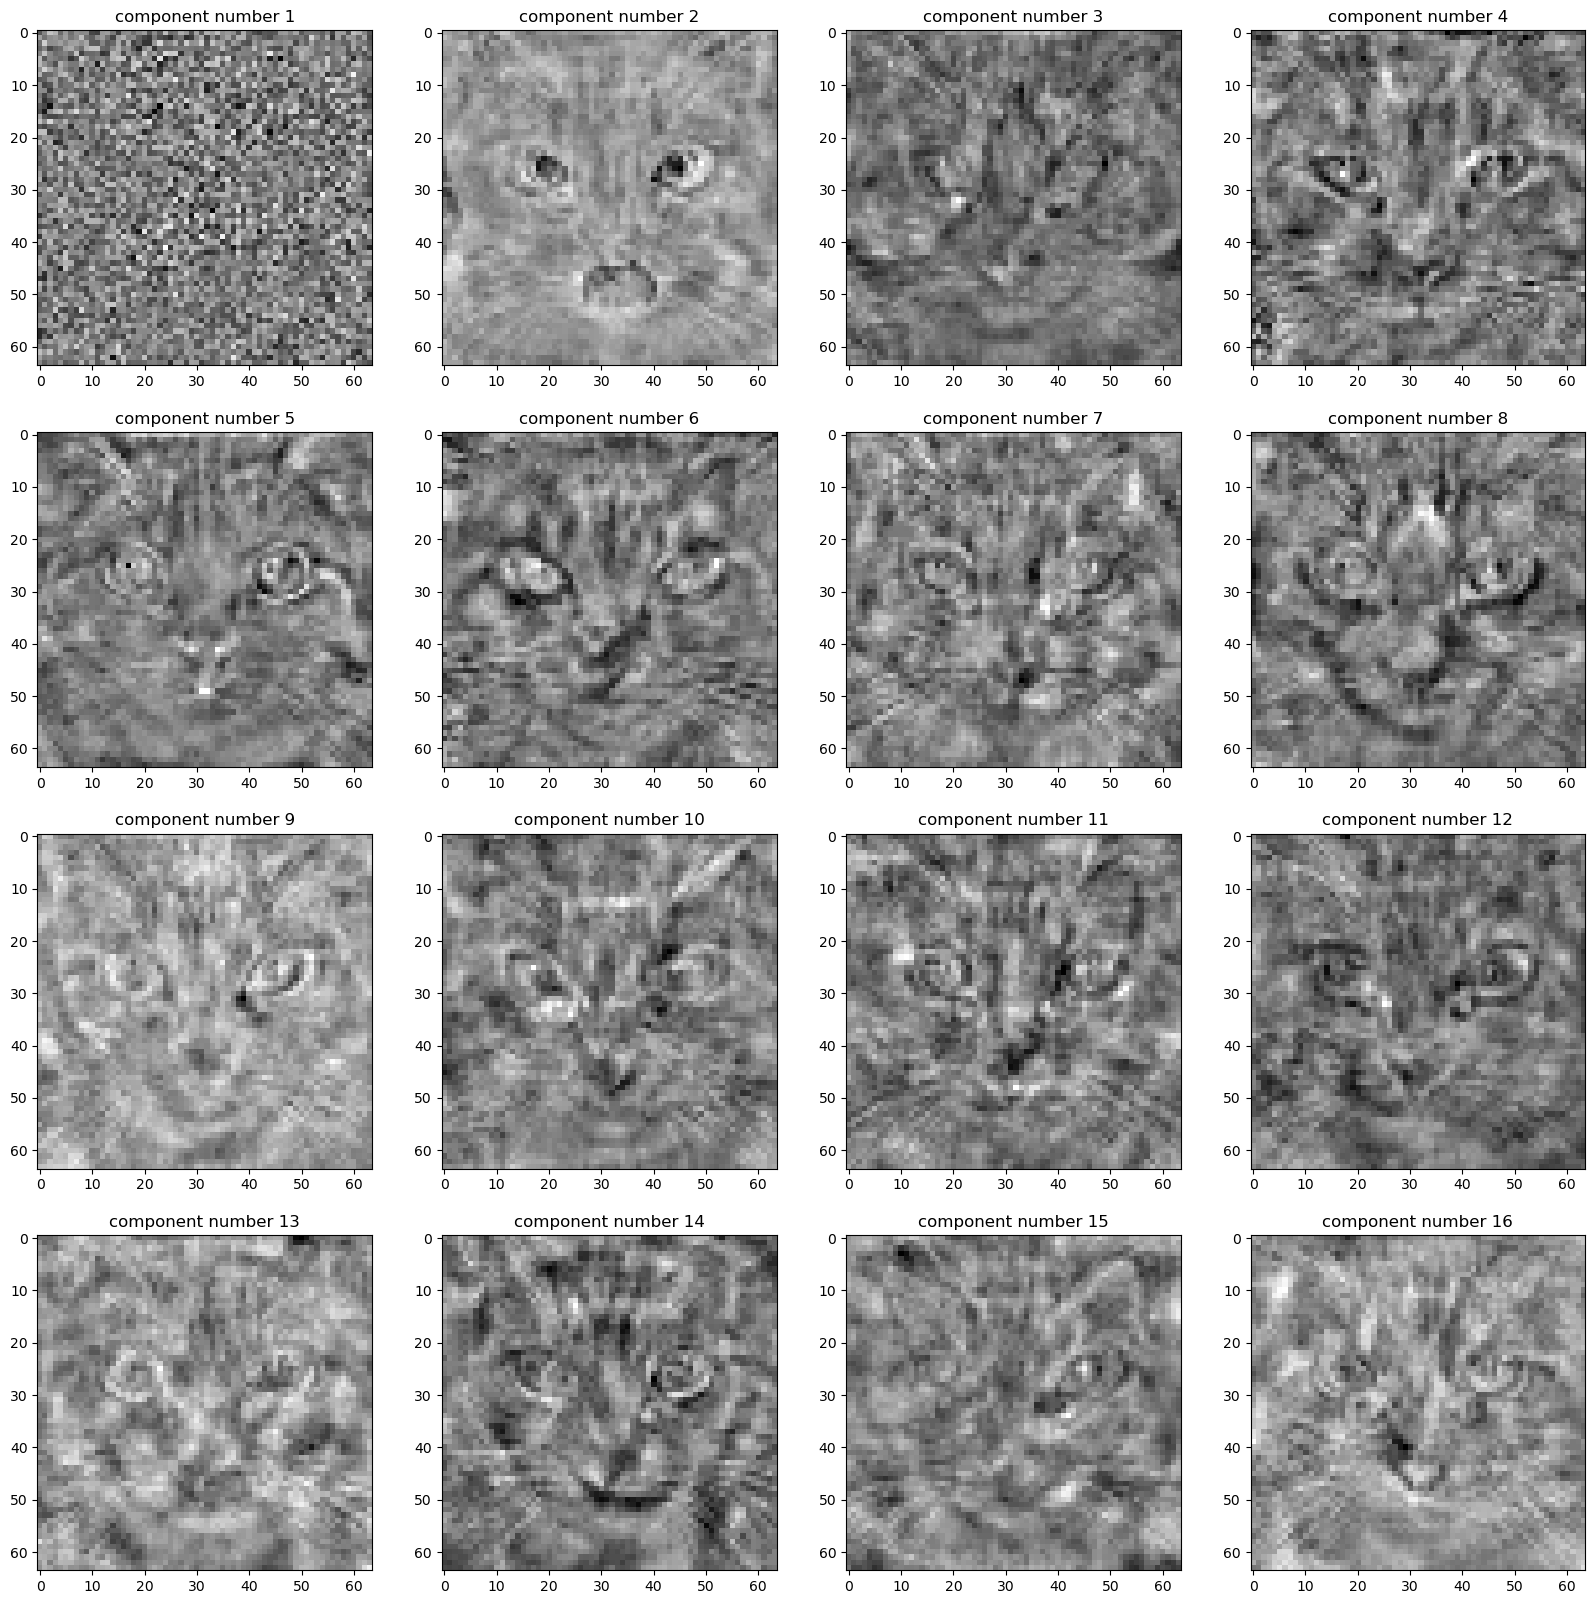

In [24]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
for n in range(4):
    for k in range(4):
        ax[n,k].imshow(eigenvecs[:,n*4+k].reshape(height,width), cmap='gray')
        ax[n,k].set_title(f'component number {n*4+k+1}')

In [25]:
def perform_PCA(X, eigenvecs, k):
    
    V = eigenvecs[:,:k]
    Xred = X @ V
    return Xred

In [26]:
Xred2 = perform_PCA(X, eigenvecs,2)
print(f'Xred2 shape: {Xred2.shape}')

Xred2 shape: (55, 2)


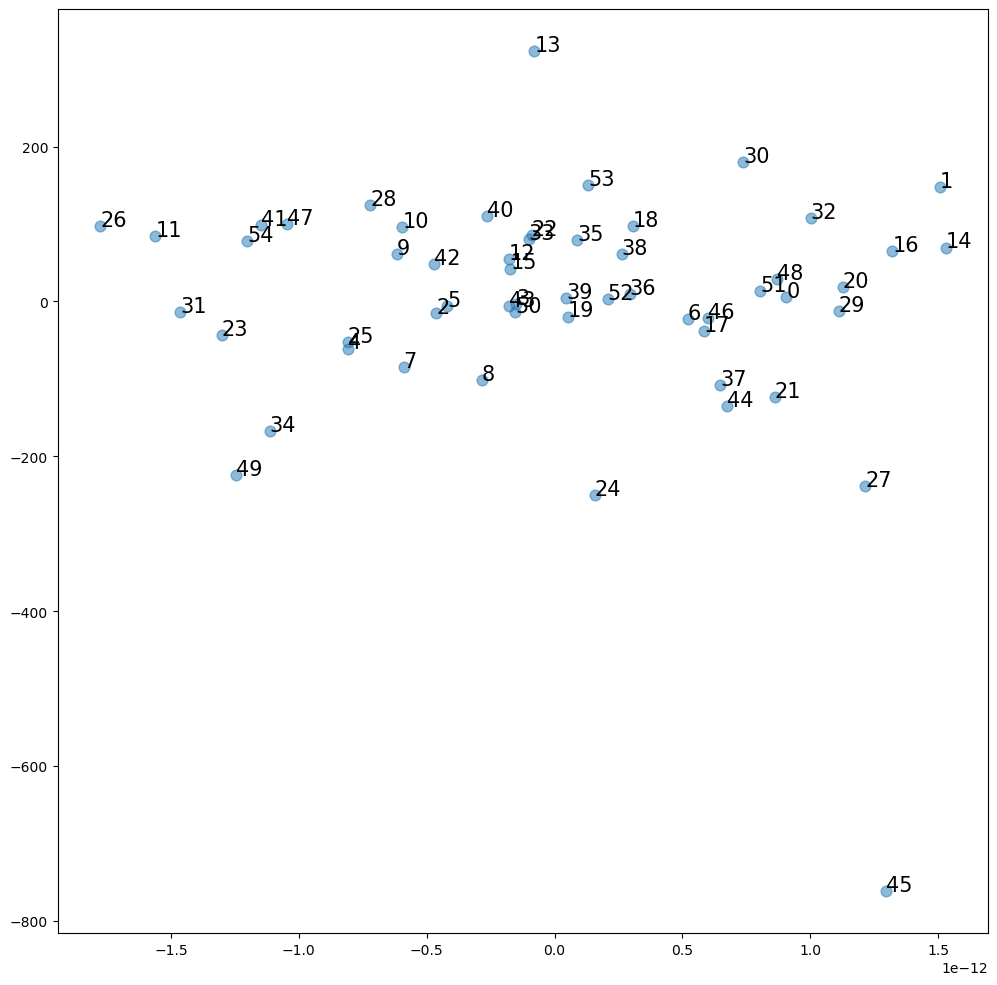

In [27]:
utils.plot_reduced_data(Xred2)

Text(0.5, 0.98, 'Similar cats')

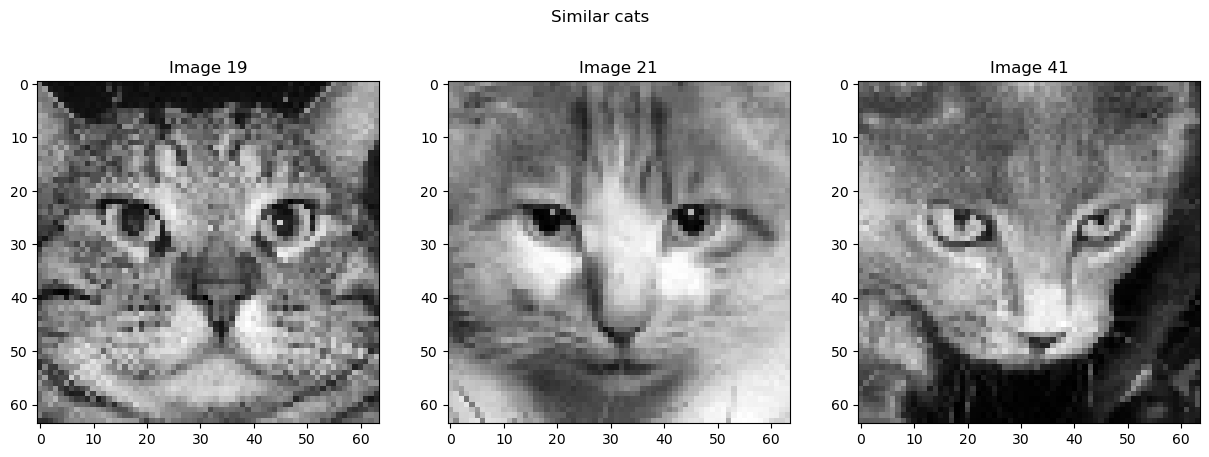

In [28]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(imgs[19], cmap='gray')
ax[0].set_title('Image 19')
ax[1].imshow(imgs[21], cmap='gray')
ax[1].set_title('Image 21')
ax[2].imshow(imgs[41], cmap='gray')
ax[2].set_title('Image 41')
plt.suptitle('Similar cats')

Text(0.5, 0.98, 'Different cats')

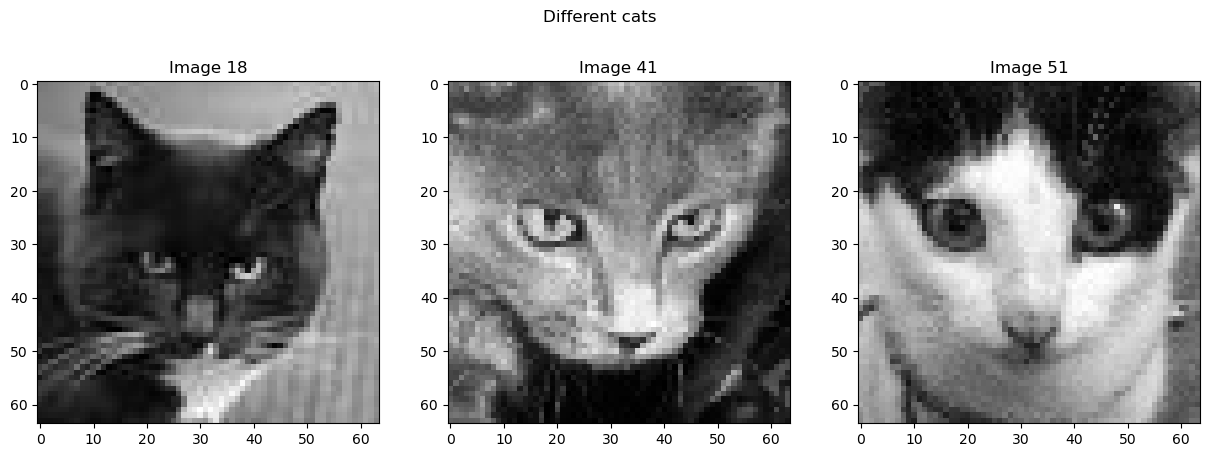

In [29]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(imgs[18], cmap='gray')
ax[0].set_title('Image 18')
ax[1].imshow(imgs[41], cmap='gray')
ax[1].set_title('Image 41')
ax[2].imshow(imgs[51], cmap='gray')
ax[2].set_title('Image 51')
plt.suptitle('Different cats')

In [30]:
def reconstruct_image(Xred, eigenvecs):
    X_reconstructed = Xred.dot(eigenvecs[:,:Xred.shape[1]].T)

    return X_reconstructed

Text(0.5, 1.0, 'reconstructed from 30 components')

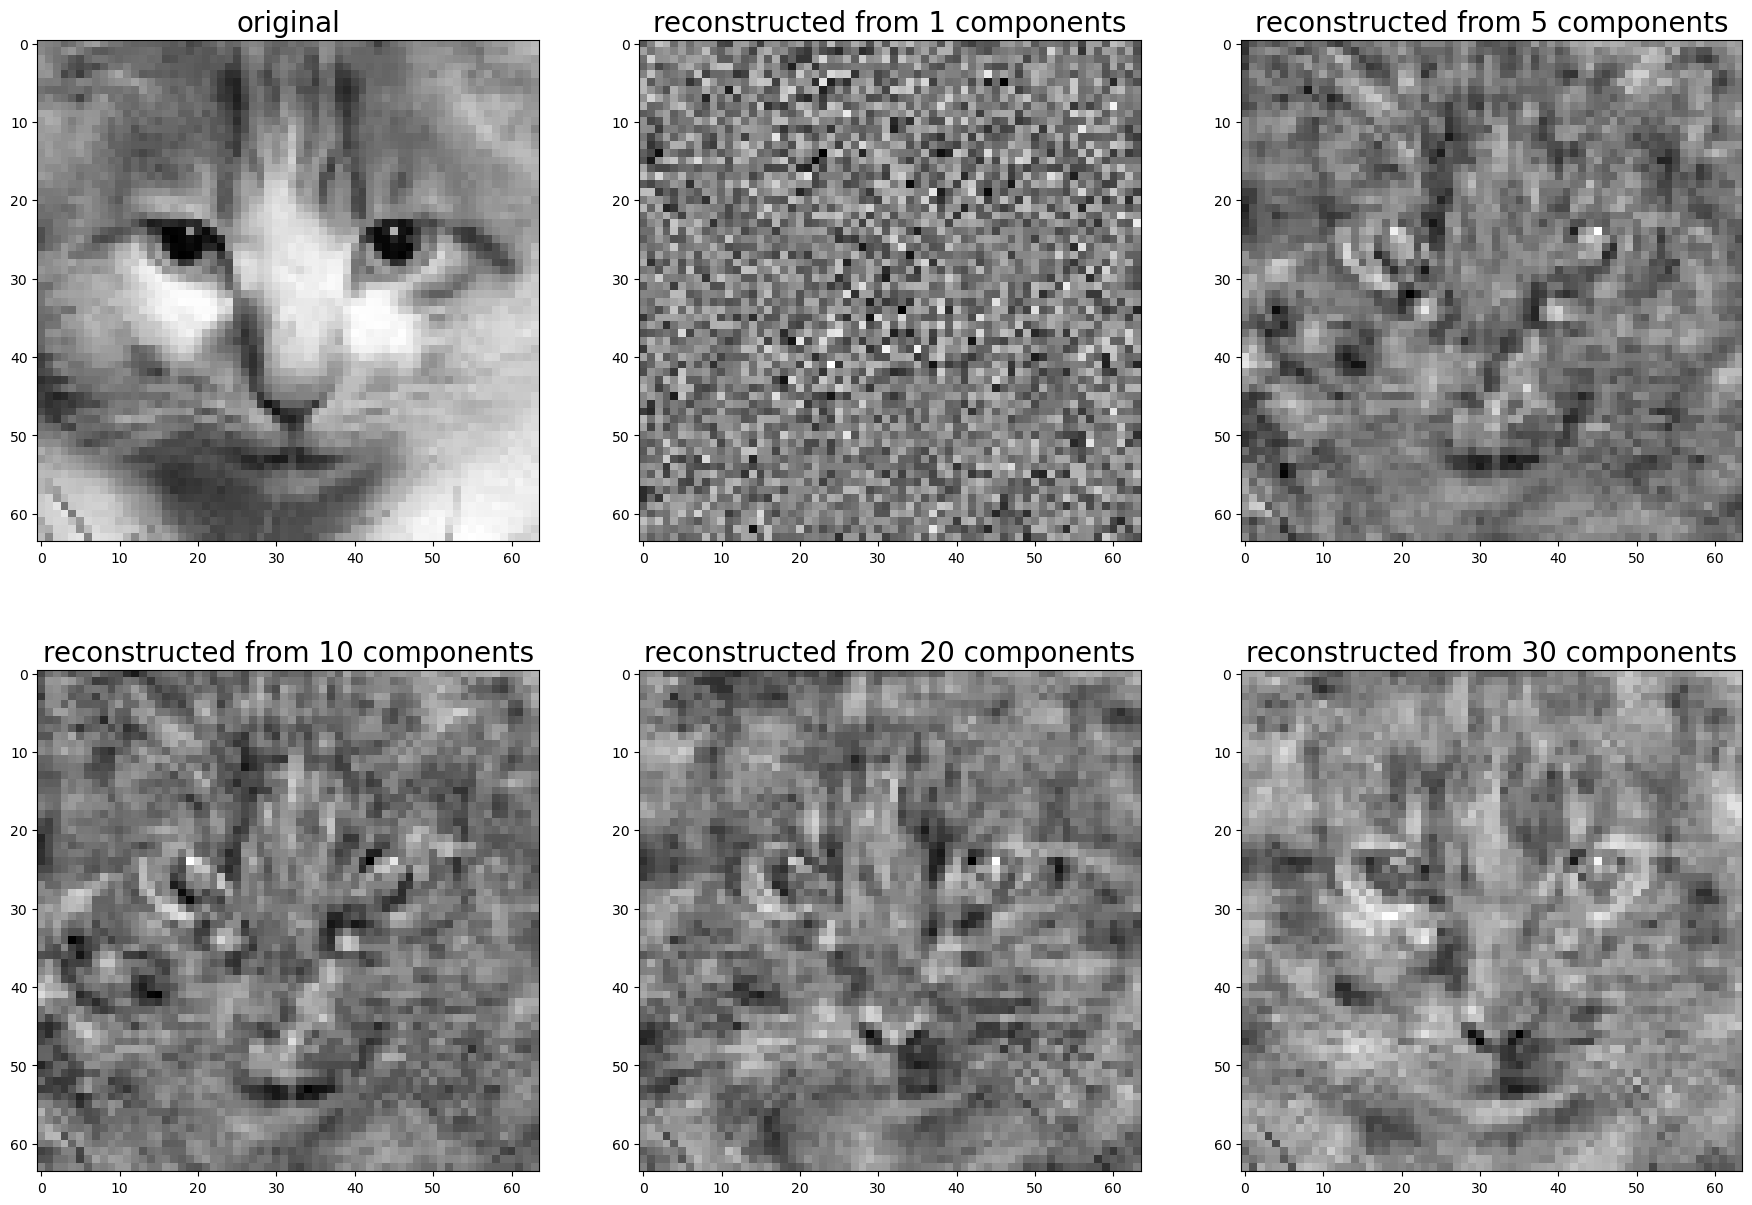

In [31]:
Xred1 = perform_PCA(X, eigenvecs,1) # reduce dimensions to 1 component
Xred5 = perform_PCA(X, eigenvecs, 5) # reduce dimensions to 5 components
Xred10 = perform_PCA(X, eigenvecs, 10) # reduce dimensions to 10 components
Xred20 = perform_PCA(X, eigenvecs, 20) # reduce dimensions to 20 components
Xred30 = perform_PCA(X, eigenvecs, 30) # reduce dimensions to 30 components
Xrec1 = reconstruct_image(Xred1, eigenvecs) # reconstruct image from 1 component
Xrec5 = reconstruct_image(Xred5, eigenvecs) # reconstruct image from 5 components
Xrec10 = reconstruct_image(Xred10, eigenvecs) # reconstruct image from 10 components
Xrec20 = reconstruct_image(Xred20, eigenvecs) # reconstruct image from 20 components
Xrec30 = reconstruct_image(Xred30, eigenvecs) # reconstruct image from 30 components

fig, ax = plt.subplots(2,3, figsize=(22,15))
ax[0,0].imshow(imgs[21], cmap='gray')
ax[0,0].set_title('original', size=20)
ax[0,1].imshow(Xrec1[21].reshape(height,width), cmap='gray')
ax[0,1].set_title('reconstructed from 1 components', size=20)
ax[0,2].imshow(Xrec5[21].reshape(height,width), cmap='gray')
ax[0,2].set_title('reconstructed from 5 components', size=20)
ax[1,0].imshow(Xrec10[21].reshape(height,width), cmap='gray')
ax[1,0].set_title('reconstructed from 10 components', size=20)
ax[1,1].imshow(Xrec20[21].reshape(height,width), cmap='gray')
ax[1,1].set_title('reconstructed from 20 components', size=20)
ax[1,2].imshow(Xrec30[21].reshape(height,width), cmap='gray')
ax[1,2].set_title('reconstructed from 30 components', size=20)

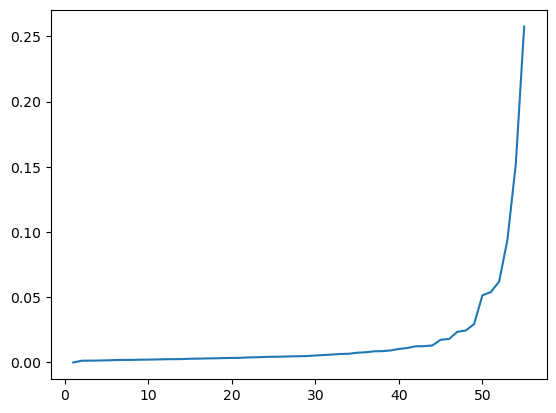

In [32]:
explained_variance = eigenvals/sum(eigenvals)
plt.plot(np.arange(1,56), explained_variance)

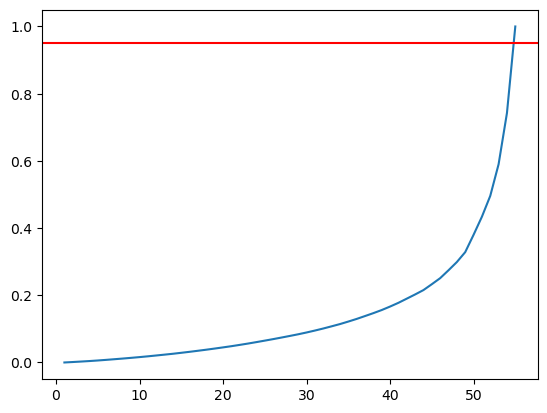

In [33]:
explained_cum_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1,56), explained_cum_variance)
plt.axhline(y=0.95, color='r')

Text(0.5, 1.0, 'Reconstructed')

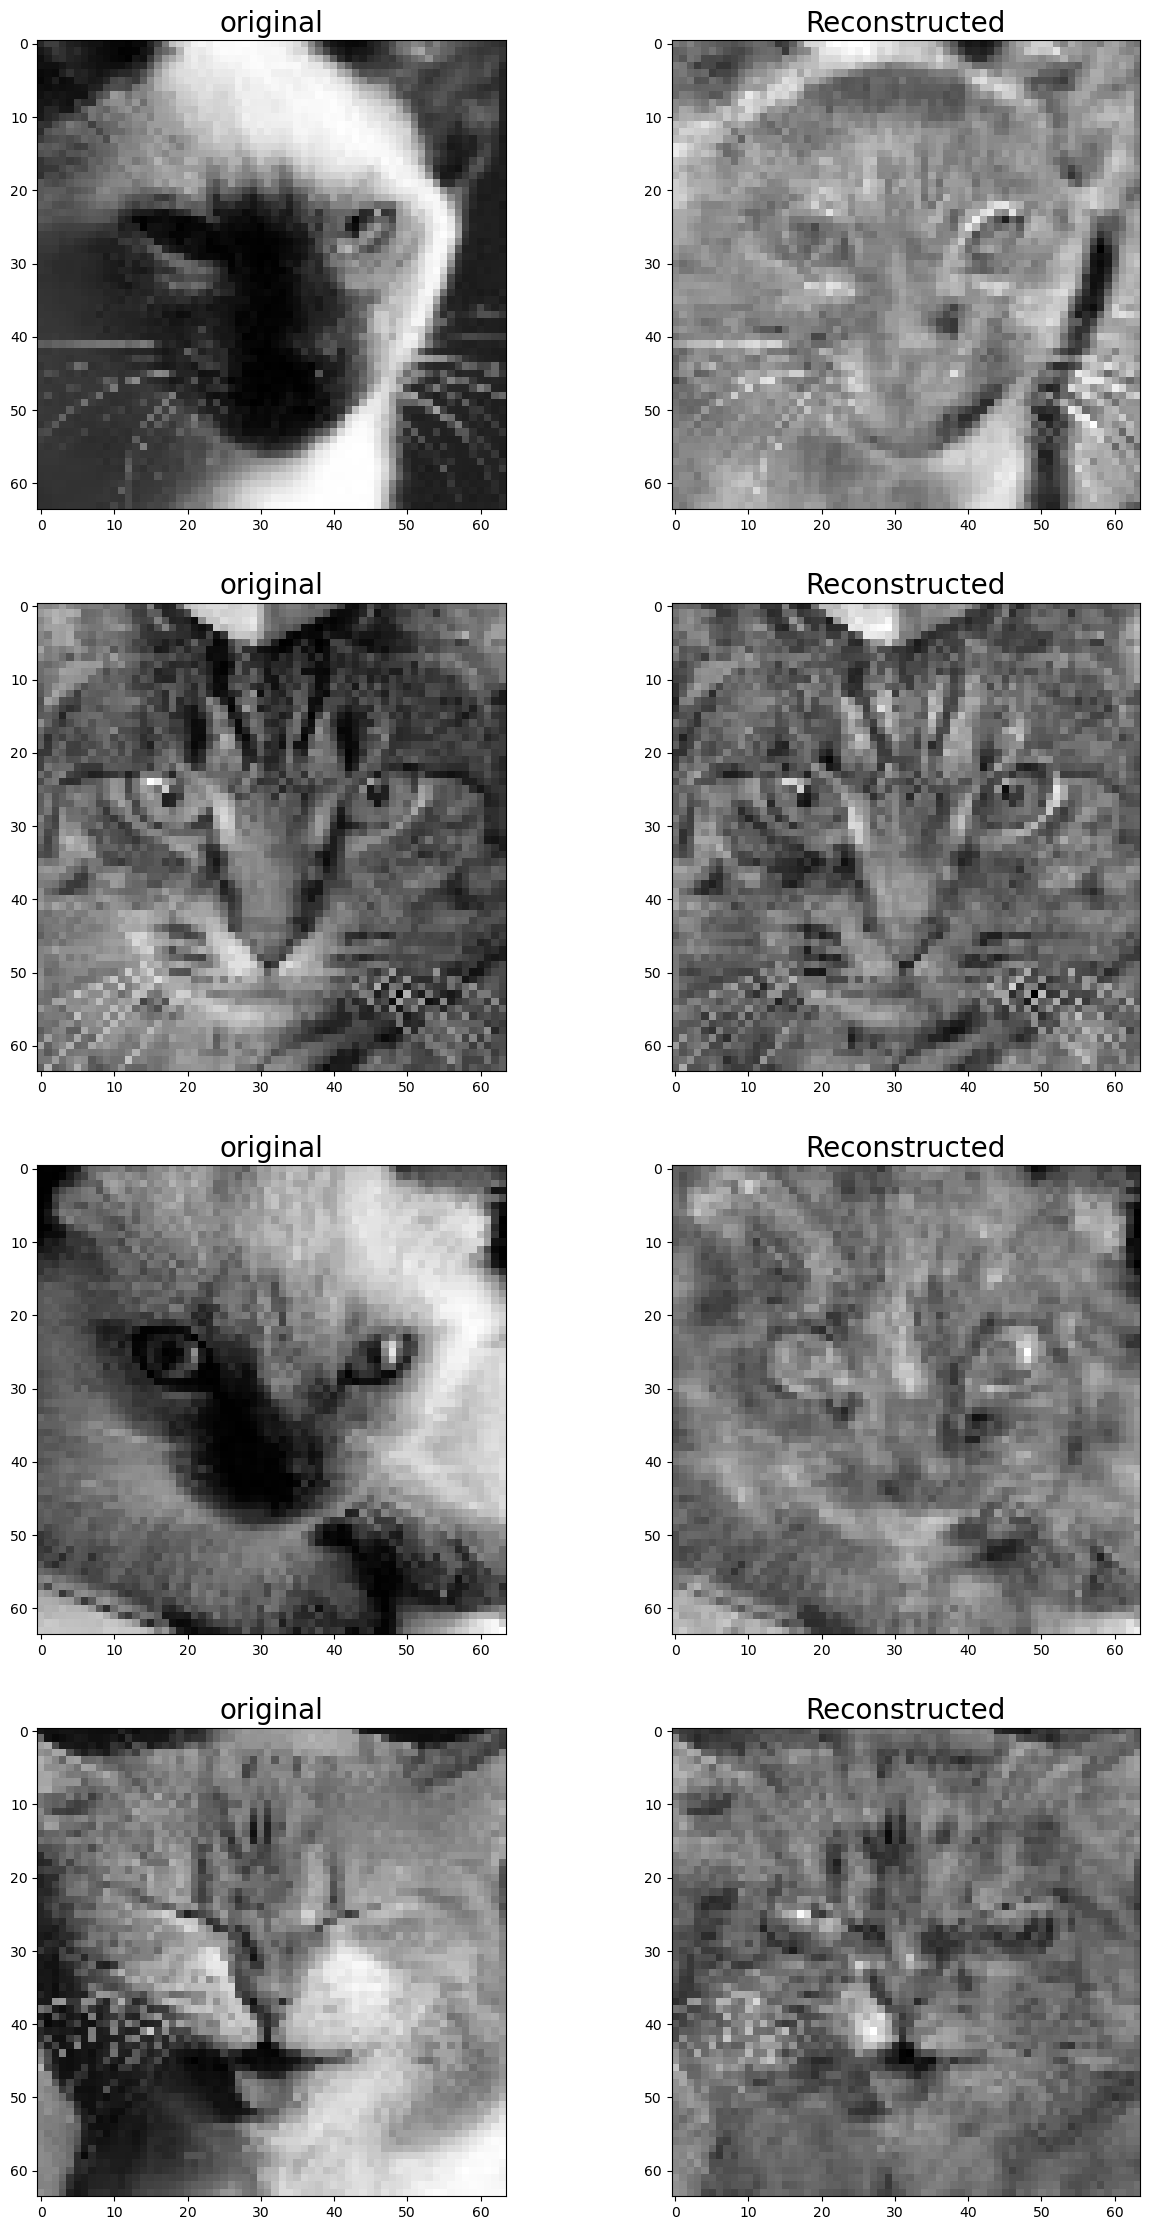

In [34]:
Xred35 = perform_PCA(X, eigenvecs, 35) # reduce dimensions to 35 components
Xrec35 = reconstruct_image(Xred35, eigenvecs) # reconstruct image from 35 components

fig, ax = plt.subplots(4,2, figsize=(15,28))
ax[0,0].imshow(imgs[0], cmap='gray')
ax[0,0].set_title('original', size=20)
ax[0,1].imshow(Xrec35[0].reshape(height, width), cmap='gray')
ax[0,1].set_title('Reconstructed', size=20)

ax[1,0].imshow(imgs[15], cmap='gray')
ax[1,0].set_title('original', size=20)
ax[1,1].imshow(Xrec35[15].reshape(height, width), cmap='gray')
ax[1,1].set_title('Reconstructed', size=20)

ax[2,0].imshow(imgs[32], cmap='gray')
ax[2,0].set_title('original', size=20)
ax[2,1].imshow(Xrec35[32].reshape(height, width), cmap='gray')
ax[2,1].set_title('Reconstructed', size=20)

ax[3,0].imshow(imgs[54], cmap='gray')
ax[3,0].set_title('original', size=20)
ax[3,1].imshow(Xrec35[54].reshape(height, width), cmap='gray')
ax[3,1].set_title('Reconstructed', size=20)